area-target data: torch.Size([512, 22]), pins_pos: torch.Size([512, 74, 2]), b2b_connectivity: torch.Size([512, 210, 4]), p2b_connectivity: torch.Size([512, 762, 3]), placement_constraints: torch.Size([512, 22, 5])


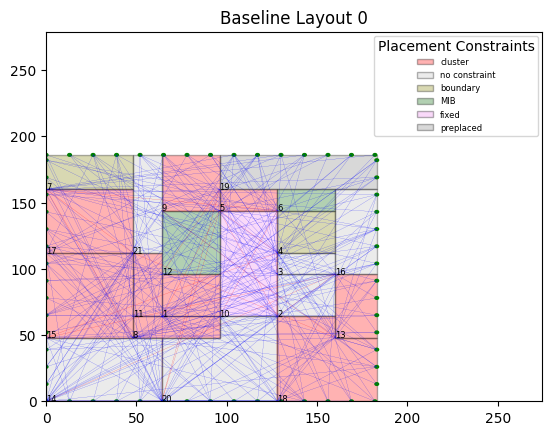

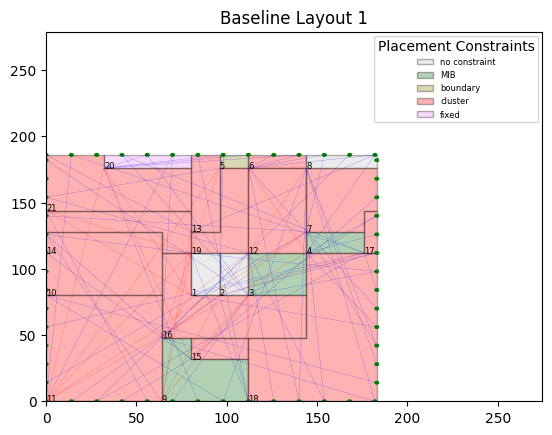

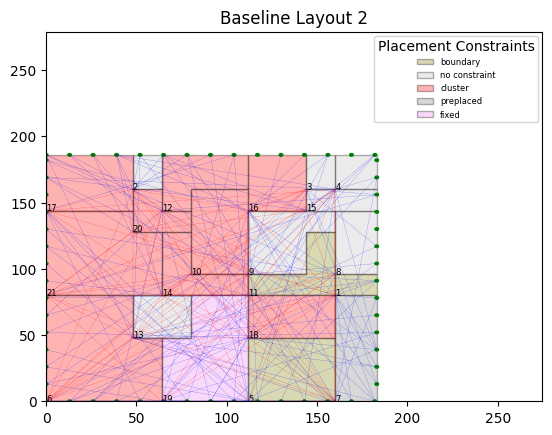

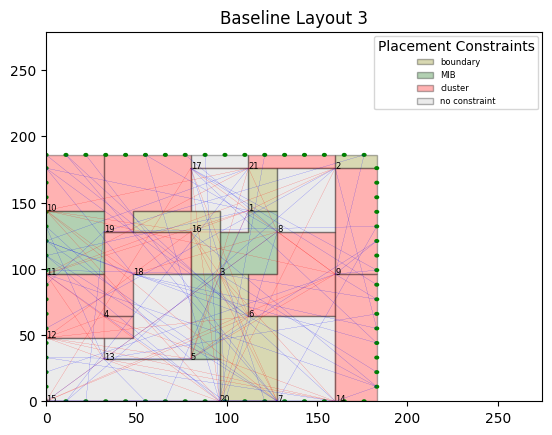

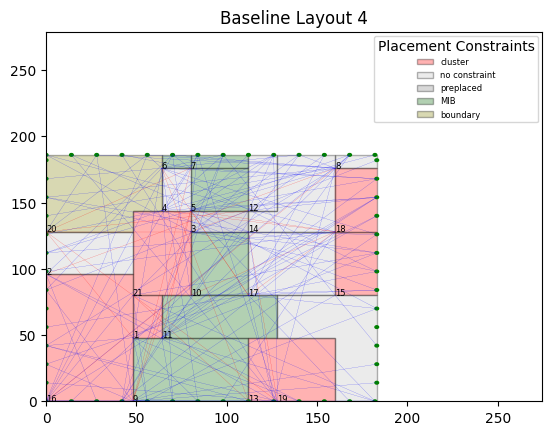

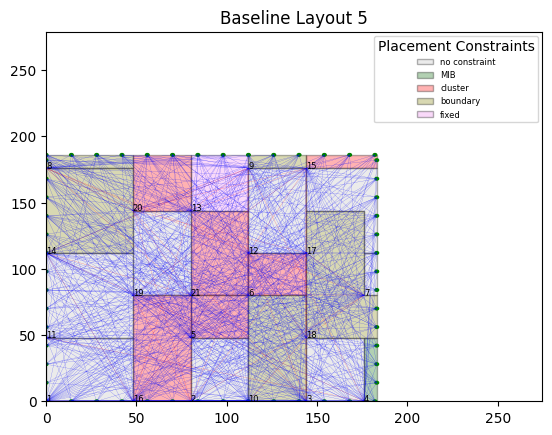

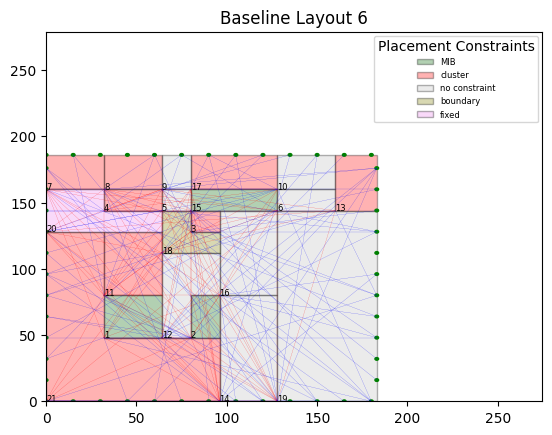

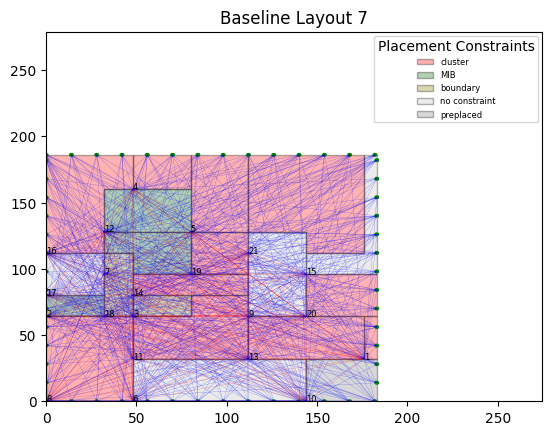

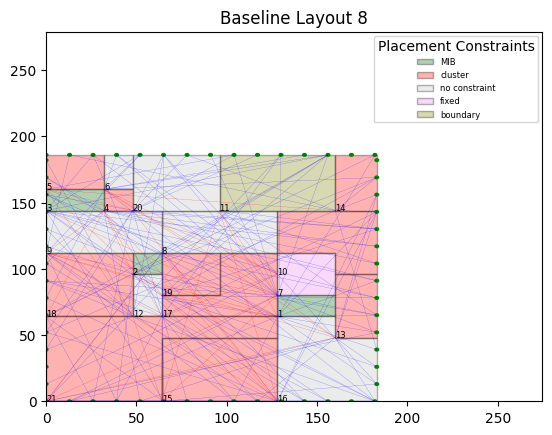

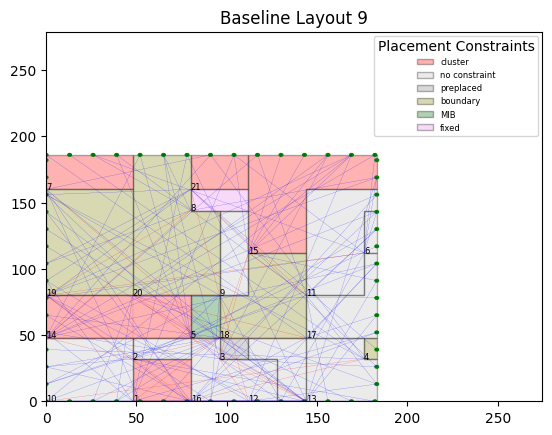

In [1]:
import torch
from torch.utils.data import DataLoader
from prime_dataset import FloorplanDataset, floorplan_collate
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Patch, Circle
import matplotlib.patches as patches
from shapely.geometry import Polygon, LineString, Point
import copy
from visualize import get_hard_color, visualize_prime


def main():
    root = './'
    ds = FloorplanDataset(root)
    
    # Create DataLoader with no shuffling for effective file caching
    dl = DataLoader(
        ds, 
        batch_size=512, 
        shuffle=False,
        collate_fn=floorplan_collate
    )
    
    # Iterate over DataLoader
    for (
        area_target,  # bsz x n_blocks - Area targets for each block
        b2b_connectivity,  # bsz x b2b_edges x edge-weight
        p2b_connectivity,  # bsz x p2b_edges x edge-weight
        pins_pos,  # bsz x n_pins x 2 - Pins or terminals (x, y) location
        placement_constraints  # bsz x n_blocks x 5 - [fixed, preplaced, multi-instantiation, cluster, boundary]
    ), (sol, metrics) in dl:
        print(f'area-target data: {area_target.size()}, '
              f'pins_pos: {pins_pos.size()}, '
              f'b2b_connectivity: {b2b_connectivity.size()}, '
              f'p2b_connectivity: {p2b_connectivity.size()}, '
              f'placement_constraints: {placement_constraints.size()}')
        break

    # Visualize results of the first batch, first-10 samples
    for vis_ind in range(10):
        layout_ind = str(vis_ind)
        visualize_prime(
            sol[vis_ind], 
            b2b_connectivity[vis_ind], 
            p2b_connectivity[vis_ind], 
            pins_pos[vis_ind], 
            placement_constraints[vis_ind],
            layout_ind
        )


if __name__ == "__main__":
    main()


In [2]:
!pwd

/workdisk/nosnap/git_repos/FloorSet


In [3]:
!rm -rf /workdisk/nosnap/git_repos/FloorSet/PrimeTensorData/